In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KArmedBandit:
    def __init__(self, k):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # True action values
        self.optimal_action = np.argmax(self.q_true)  # Optimal action
        
        self.action_count = np.zeros(k)  # Count of actions taken
        self.q_estimated = np.zeros(k)  # Estimated action values

    def step(self, action):
        reward = np.random.normal(self.q_true[action], 1)
        self.action_count[action] += 1
        
        # sample-average method to update estimated action value
        self.q_estimated[action] += (reward - self.q_estimated[action]) / self.action_count[action]
        
        return reward

In [3]:
def run_experiment(k, steps, epsilon):
    bandit = KArmedBandit(k)
    
    Q = np.zeros(k)   # cummulative estimated action values
    N = np.zeros(k)   # action counts
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for step in range(steps):
        action = np.random.choice(k) if np.random.rand() < epsilon else np.argmax(bandit.q_estimated)  # Epsilon-greedy action selection
        reward = bandit.step(action)  # Take the action and get the reward
        
        rewards[step] = reward  # Store the reward for analysis
        optimal_actions[step] = 1 if action == bandit.optimal_action else 0  # Track optimal actions
    
    return rewards, optimal_actions

In [4]:
k= 10
steps = 1000
runs = 2000
epsilons = [0, 0.01, 0.1]

In [5]:

avg_rewards = np.zeros((len(epsilons), steps))
avg_optimal_actions = np.zeros((len(epsilons), steps))  

for e, epsilon in enumerate(epsilons):
    for _ in range(runs):
        rewards, optimal_actions = run_experiment(k, steps, epsilon)
        
        avg_rewards[e] += rewards
        avg_optimal_actions[e] += optimal_actions
    
    avg_rewards[e] /= runs  # Average rewards over all runs
    avg_optimal_actions[e] /= runs  # Average optimal action selection over all runs

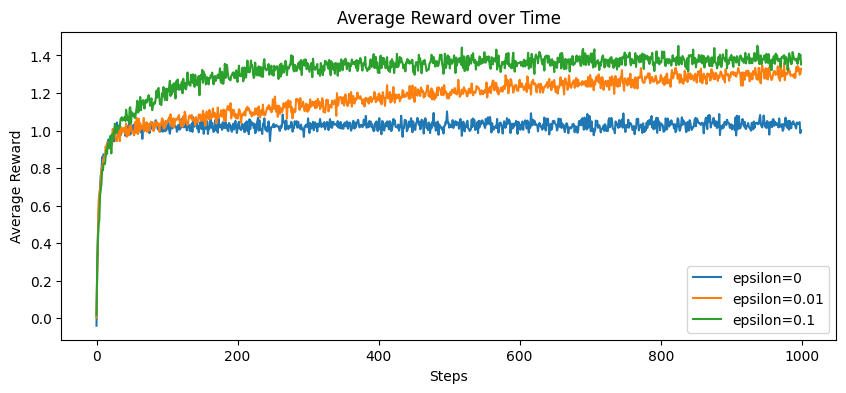

In [8]:
 # Plot average rewards
plt.figure(figsize=(10,4))
for e, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[e], label=f'epsilon={epsilon}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.show()  
        

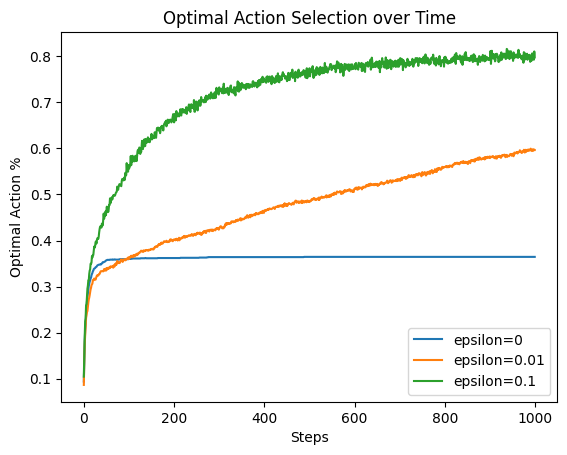

In [9]:
 # Plot optimal action selection
plt.figure()
for e, epsilon in enumerate(epsilons):
    plt.plot(avg_optimal_actions[e], label=f'epsilon={epsilon}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.title('Optimal Action Selection over Time')
plt.legend()
plt.savefig("optimal_action_selection.png")